In [7]:
# Importendo as bibliotecas

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 # Define as dimensões dos gráficos

In [8]:
# Terremotos na Itália no ano de 2016

df = pd.read_csv('Dados//italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time') # DataFrame
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [9]:
df.index = pd.to_datetime(df.index) # Convertendo a colunda 'Time' para datetime
df.head()


,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6



### Vamos exibir variações de duas séries temporais em um mesmo gráfico. Vamos gerar um 
### gráfico de barras que mostre a variação diaria entre magnitude e profundidade.




In [10]:
# Filtrando os dados

'''
Estamos filtrando a coluna da magnitude com (df.where((df['Magnitude'] >= 3.0))), mas selecionando
as colunas de magnitude e de profundidade (dropna()['Magnitude', 'Depth/Km'])
'''

depth_mag = df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude', 'Depth/Km']]
dm = depth_mag.groupby(depth_mag.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


Text(0.5, 1.0, 'Magnitude vs Profundidade durante o dia')

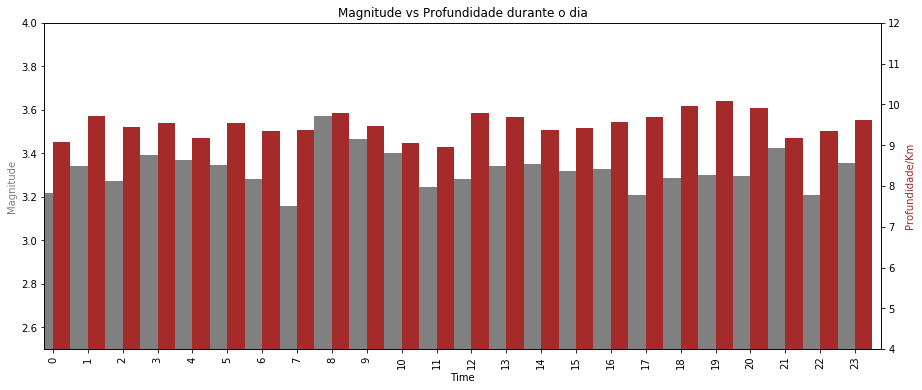

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hora do Dia")
ax.yaxis.label.set_color("gray")

ax2 = ax.twinx() # Gera outra barra com as mesmas características do eixo ax
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Profundidade/Km")
ax2.set_xlabel("Hora do Dia")
ax2.yaxis.label.set_color("brown")

width = 0.5

dm["Magnitude"].plot(kind="bar", color='gray', ax=ax, width=width, position=1)
dm["Depth/Km"].plot(kind="bar", color="brown", ax=ax2, width=width, position=0)
plt.grid(False)
plt.title("Magnitude vs Profundidade durante o dia")